In [1]:
import torch
import torch.nn as nn
import numpy as np
import os

In [16]:
from obj2html import obj2html
from IPython.display import display, HTML

obj_path = 'sampleSTAR.obj'

camera={
  "fov": 45,
  "aspect": 2,
  "near": 0.1,
  "far": 1000,
  "pos_x": 0,
  "pos_y": 5,
  "pos_z": 70,
  "orbit_x": 0,
  "orbit_y": 20,
  "orbit_z": 0,
}
light={
  "color": "0xFFFFFF",
  "intensity": 0.5,
  "pos_x": 0,
  "pos_y": 0,
  "pos_z": 0,
  "target_x": -10,
  "target_y": 0,
  "target_z": 0,
}
obj_options={
  "scale_x": 10,
  "scale_y": 10,
  "scale_z": 10,
}

obj2html(obj_path, 'index.html', camera, light, obj_options)

display(HTML('index.html'))

In [3]:
''' 
finalVertexList = []
finalTextureList = []
        count=1
        firstSet=[]
        secondSet=[]
        firstTextureSet=[]
        secondTextureSet = []
        while count<4:
            removeSlash = split[count].split('/')
            if count == 1:
                firstSet.append(vList[int(removeSlash[0])-1])
                secondSet.append(vList[int(removeSlash[0])-1])
                firstTextureSet.append(vtList[int(removeSlash[1])-1])
                secondTextureSet.append(textureList[int(removeSlash[1])-1])
            elif count == 2:
                firstSet.append(vertexList[int(removeSlash[0])-1])
                firstTextureSet.append(textureList[int(removeSlash[1])-1])
            elif count == 3:
                firstSet.append(vertexList[int(removeSlash[0])-1])
                secondSet.append(vertexList[int(removeSlash[0])-1])
                firstTextureSet.append(textureList[int(removeSlash[1])-1])
                secondTextureSet.append(textureList[int(removeSlash[1])-1])
            elif count == 4:
                secondSet.append(vertexList[int(removeSlash[0])-1])
                secondTextureSet.append(textureList[int(removeSlash[1])-1])

            count+=1
        finalVertexList.append(firstSet)
        finalVertexList.append(secondSet)
        finalTextureList.append(firstTextureSet)
        finalTextureList.append(secondTextureSet)



vertexCount = 0
for item in finalVertexList:
    for cordinateTrio in item:
        for cordinate in cordinateTrio:
            finalVertex.write(str(cordinate)+'f*x, ')
    vertexCount += 1

textureCount = 0
for item in finalTextureList:
    for cordinateTrio in item:
        for cordinate in cordinateTrio:
            finalTexture.write(str(cordinate)+'f, ')
    textureCount += 1

print ("Total vertices: " + str(vertexCount*3))
print ("Total texture cordinates: " + str(vertexCount*2))

objFile.close()
finalTexture.close()
finalVertex.close() '''

' \nfinalVertexList = []\nfinalTextureList = []\n        count=1\n        firstSet=[]\n        secondSet=[]\n        firstTextureSet=[]\n        secondTextureSet = []\n        while count<4:\n            removeSlash = split[count].split(\'/\')\n            if count == 1:\n                firstSet.append(vList[int(removeSlash[0])-1])\n                secondSet.append(vList[int(removeSlash[0])-1])\n                firstTextureSet.append(vtList[int(removeSlash[1])-1])\n                secondTextureSet.append(textureList[int(removeSlash[1])-1])\n            elif count == 2:\n                firstSet.append(vertexList[int(removeSlash[0])-1])\n                firstTextureSet.append(textureList[int(removeSlash[1])-1])\n            elif count == 3:\n                firstSet.append(vertexList[int(removeSlash[0])-1])\n                secondSet.append(vertexList[int(removeSlash[0])-1])\n                firstTextureSet.append(textureList[int(removeSlash[1])-1])\n                secondTextureSet.ap

In [4]:
objFile = open(obj_path, 'r')
finalTexture = open('finalTexture.txt', 'w')
finalVertex = open('finalVertex.txt', 'w')


vList = []
vtList = []
vnList = []
fList__ = []
fList = []  

for line in objFile:
    split = line.split()
    #if blank line, skip
    if not len(split):
        continue
    if split[0] == "v":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vList.append(float_lst)
    elif split[0] == "vt":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vtList.append(float_lst)
    elif split[0] == "vn":
        float_lst = list(np.array(split[1:], dtype = 'float'))
        vnList.append(float_lst)
    elif split[0] == "f":
        fList__.append(split[1:])
        new = []
        for value in split[1:]:
            each = value.split('/')
            int_lst = list(np.array(each, dtype='int'))
            new.append(int_lst)
        fList.append(new)
                
vList = torch.as_tensor(vList)
vtList = torch.as_tensor(vtList)
vnList = torch.as_tensor(vnList)
fList = torch.as_tensor(fList)

print('v')
print(vList.shape)
print(vList, '\n')

print('vt')
print(vtList.shape)
print(vtList, '\n')

print('vn')
print(vnList.shape)
print(vnList, '\n')

print('f')
print(fList.shape)
print(fList)

v
torch.Size([6890, 3])
tensor([[ 0.1163,  4.5813,  0.2896],
        [ 0.1475,  4.5655,  0.2643],
        [ 0.1323,  4.6189,  0.2599],
        ...,
        [-0.2261,  4.4228,  0.0081],
        [-0.2278,  4.4263,  0.0142],
        [-0.2349,  4.4214,  0.0219]], dtype=torch.float64) 

vt
torch.Size([7576, 2])
tensor([[0.3595, 0.8661],
        [0.3792, 0.8631],
        [0.3716, 0.8811],
        ...,
        [0.0117, 0.2181],
        [0.0111, 0.3257],
        [0.0160, 0.3907]], dtype=torch.float64) 

vn
torch.Size([13770, 3])
tensor([[ 0.6820,  0.2522,  0.6865],
        [ 0.7535,  0.2655,  0.6014],
        [ 0.6896,  0.3623,  0.6271],
        ...,
        [-0.0208,  0.2644,  0.9642],
        [-0.0169,  0.3298,  0.9439],
        [-0.0142,  0.3266,  0.9451]], dtype=torch.float64) 

f
torch.Size([13776, 3, 3])
tensor([[[    1,     1,     1],
         [    2,     2,     1],
         [    3,     3,     1]],

        [[    3,     3,     2],
         [    2,     2,     2],
         [    4,     4, 

In [5]:
print(len(vList))
x=[]
y=[]
z=[]
for i in range(len(vList)):
    x.append(vList[i][0].item())
    y.append(vList[i][1].item())
    z.append(vList[i][2].item())

print(x)
print(y)
print(z)

6890
[0.116273, 0.147509, 0.132289, 0.164459, 0.137906, 0.108338, 0.168085, 0.183196, 0.200416, 0.197979, 0.188319, 0.182856, 0.168863, 0.176731, 0.186464, 0.190856, 0.087521, 0.099486, 0.07157, 0.081365, 0.048012, 0.033588, 0.04448, 0.03276, 0.072442, 0.055373, 0.057806, 0.051794, 0.047343, 0.037601, 0.042572, 0.033699, 0.052545, 0.04522, 0.051195, 0.040898, 0.042801, 0.034069, 0.024756, 0.022443, 0.119814, 0.104902, 0.10354, 0.089477, 0.044336, 0.054594, 0.055781, 0.038602, 0.037909, 0.11815, 0.119362, 0.135789, 0.136118, 0.131576, 0.112803, 0.117847, 0.100572, 0.101602, 0.084632, 0.031195, 0.044918, 0.048793, 0.06482, 0.064224, 0.065466, 0.052604, 0.053476, 0.080957, 0.08027, 0.075839, 0.075543, 0.066039, 0.069715, 0.072868, 0.055434, 0.029721, 0.02569, 0.018552, 0.01613, 0.075305, 0.082721, 0.067868, 0.071796, 0.087298, 0.091238, 0.09699, 0.087231, 0.089286, 0.078696, 0.080748, 0.0712, 0.047407, 0.054788, 0.060748, 0.069533, 0.078015, 0.11199, 0.101784, 0.101247, 0.094788, 0.082633

In [6]:
x_foot = []
y_foot = []
z_foot = []
for i in range(len(vList)):
    if (vList[i][1].item()<1 ) :
        x_foot.append(vList[i][0].item())
        y_foot.append(vList[i][1].item())
        z_foot.append(vList[i][2].item())
        
print(len(x))
print(len(x_foot))
        

6890
804


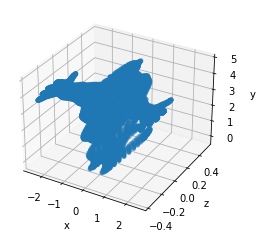

In [7]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

'''fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, z, y, 'gray')'''

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, z, y, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y');


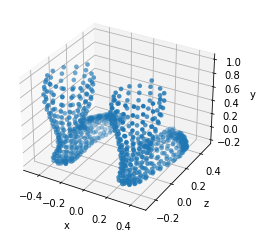

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

'''fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, z, y, 'gray')'''

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_foot, z_foot, y_foot, cmap='viridis', linewidth=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y');

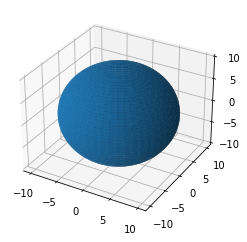

[[0.00000000e+00 3.17279335e-01 6.34239197e-01 ... 6.34239197e-01
  3.17279335e-01 1.22464680e-15]
 [0.00000000e+00 3.16640549e-01 6.32962268e-01 ... 6.32962268e-01
  3.16640549e-01 1.22218119e-15]
 [0.00000000e+00 3.14726763e-01 6.29136624e-01 ... 6.29136624e-01
  3.14726763e-01 1.21479429e-15]
 ...
 [0.00000000e+00 3.14726763e-01 6.29136624e-01 ... 6.29136624e-01
  3.14726763e-01 1.21479429e-15]
 [0.00000000e+00 3.16640549e-01 6.32962268e-01 ... 6.32962268e-01
  3.16640549e-01 1.22218119e-15]
 [0.00000000e+00 3.17279335e-01 6.34239197e-01 ... 6.34239197e-01
  3.17279335e-01 1.22464680e-15]]
100
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.01230991e-02  4.02259358e-02 ...  4.02259358e-02
   2.01230991e-02  7.76719002e-17]
 [ 0.00000000e+00  4.01651695e-02  8.02898960e-02 ...  8.02898960e-02
   4.01651695e-02  1.55031043e-16]
 ...
 [-0.00000000e+00 -4.01651695e-02 -8.02898960e-02 ... -8.02898960e-02
  -4.0

In [9]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

plt.show()

print(x)
print(len(x))
print(y)
print(len(y))
print(z)
print(len(z))

print(len(x[0]))
print(len(y[0]))
print(len(z[0]))

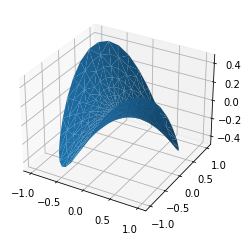

'print(x)\nprint(y)\nprint(z)'

In [10]:
import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

ax = plt.figure().add_subplot(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()
'''print(x)
print(y)
print(z)'''
